In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [2]:
files = os.listdir('../results_sim_data/')

In [3]:
%%time
data = None
for file in files:
    if 'f1' not in file:
        continue
    df = pd.read_csv('../results_sim_data/{}'.format(file), index_col=0)
    df['it_number'] = [file.split('_')[3]]
    df['num_samples'] = [file.split('_')[5]]
    if data is None:
        data = df
    else:
        data = data.append(df,ignore_index = True)

CPU times: user 5.44 s, sys: 109 ms, total: 5.55 s
Wall time: 11.2 s


In [4]:
data.head(2)

,ari_new,ari_naive,ovalue_new,ovalues_naive,sigma_new,sigma_naive,mu_new,mu_naive,theta_new,theta_naive,pz_new,pz_naive,it_number,num_samples
0,0.852699,0.846479,-3782.874714,-3784.885332,"0.649899448597834,1.39727893335613,1.825682052...","0.658153480521644,1.4085623961926,1.4457777587...","-0.0120325397667653,3.09416921027917,-3.121056...","-0.00647122816162147,3.09946532203943,2.889323...","3.02518316236521,-3.01455977188637,-0.09495561...","3.1397778068022,-0.106624818108864,-3.07263888...","0.32525337442666,0.345404604200217,0.329342021...","0.325420963151107,0.32666123075074,0.347917806...",313,900
1,0.802742,0.803344,-1241.307030,-1241.950118,"1.39048874476422,2.8223014008252,0.83204500190...","1.44960143110751,2.65467446885164,2.1095540205...","2.93090500955833,0.916037437876245,0.059854387...","2.90636649866404,0.584465145653914,-2.63907153...","0.281963367951314,3.481326230979,-4.0085854726...","0.666144746001611,-4.49189000545007,4.10465326...","0.293572674458705,0.368198799596654,0.33822852...","0.282123149409169,0.31248609560107,0.405390754...",176,300


In [5]:
def calculate_theta(x):
    x = list(map(float,x.split(',')))
    x.sort()
    x = np.array(x)
    x = np.abs(x -np.array([-3.45,0,3.45]))
    return x.sum()/3
data['theta_val_new'] = data.theta_new.apply(calculate_theta)
data['theta_val_naive'] = data.theta_naive.apply(calculate_theta)

In [6]:
df = df_1 = data[['ari_new','it_number','num_samples','ovalue_new','theta_val_new']].copy()
df = df.append(data[['ari_naive','it_number','num_samples','ovalues_naive','theta_val_naive']].copy())
df.fillna(0, inplace = True)
df['ari'] = df.ari_new+df.ari_naive
df['ovalue'] = df.ovalue_new+df.ovalues_naive
df['theta_dif'] = df.theta_val_new + df.theta_val_naive
df['label'] = ['new']*len(data)+['naive']*len(data)
df.sort_values('num_samples',inplace=True)

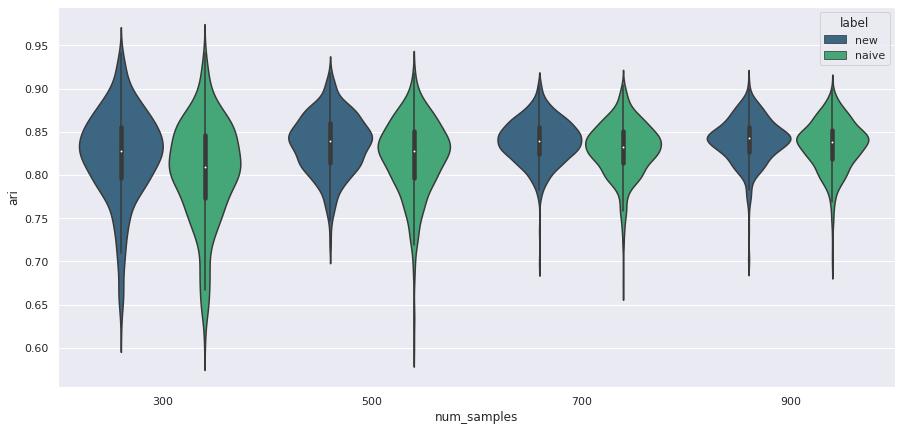

In [7]:
fig, ax = plt.subplots(figsize=(15,7))
g = sns.violinplot(data=df[df.ari>0.6], y = 'ari', x = 'num_samples', hue = 'label' , palette = 'viridis', ax = ax)

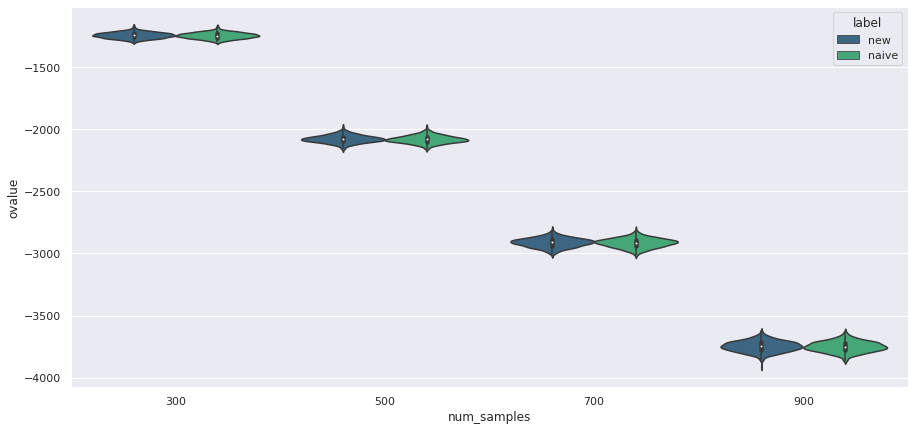

In [8]:
fig, ax = plt.subplots(figsize=(15,7))
g = sns.violinplot(data=df[df.ari>0.6], y = 'ovalue', x = 'num_samples', hue = 'label' , palette = 'viridis', ax = ax)

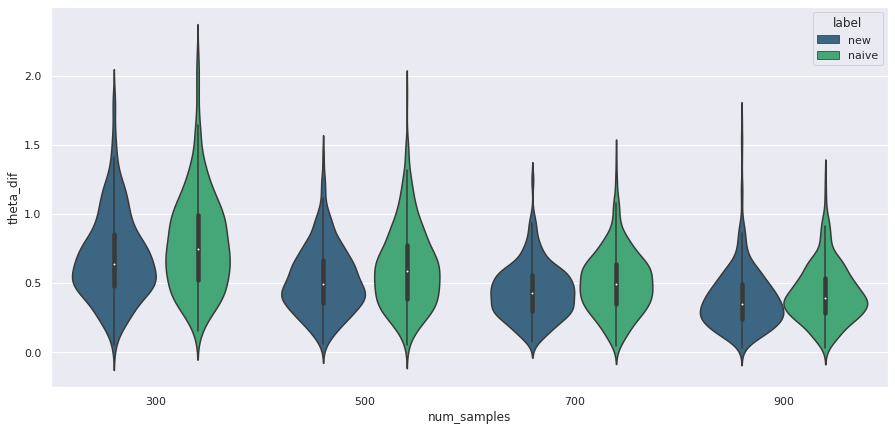

In [9]:
fig, ax = plt.subplots(figsize=(15,7))
g = sns.violinplot(data=df[df.ari>0.6], y = 'theta_dif', x = 'num_samples', hue = 'label' , palette = 'viridis', ax = ax)